# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [20]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [21]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

### What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

In [22]:
#Check for anomalies
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_15482/29092630.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_distribution.index, y=fraud_distribution.values, palette="viridis")


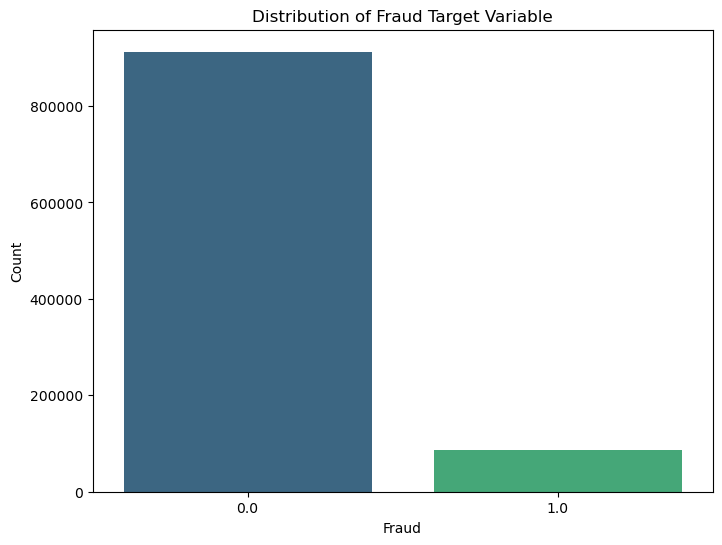

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming your data is in a DataFrame called df
fraud_distribution = fraud['fraud'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_distribution.index, y=fraud_distribution.values, palette="viridis")
plt.title('Distribution of Fraud Target Variable')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

### Train a LogisticRegression

In [24]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
log_reg = LogisticRegression()

In [27]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
log_reg.score(X_test_scaled, y_test)

0.959016

In [29]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228202
         1.0       0.89      0.60      0.72     21798

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 


In [30]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [31]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.287045,-0.086262,-0.198061,0.366666,-0.734092,-0.334436,-1.365674
1,-0.170039,-0.018875,-0.542199,0.366666,1.362227,-0.334436,0.732239
2,-0.360494,-0.129984,-0.521827,0.366666,1.362227,-0.334436,-1.365674
3,-0.357901,-0.057777,-0.504346,0.366666,-0.734092,-0.334436,0.732239
4,-0.331390,-0.110257,-0.047039,0.366666,-0.734092,-0.334436,-1.365674
...,...,...,...,...,...,...,...
749995,-0.367257,-0.012446,-0.374509,0.366666,-0.734092,-0.334436,0.732239
749996,0.219579,-0.109842,-0.020786,0.366666,-0.734092,-0.334436,0.732239
749997,-0.262673,-0.142680,-0.387434,0.366666,-0.734092,2.990109,-1.365674
749998,1.573517,-0.138666,0.439161,0.366666,-0.734092,-0.334436,-1.365674


In [32]:
train["fraud"] = y_train.values
fraud = train[train["fraud"] == 1]
legit = train[train["fraud"] == 0]

In [33]:
fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,-0.023540,-0.073038,1.901990,0.366666,1.362227,-0.334436,0.732239,1.0
24,-0.315996,-0.173833,5.952946,0.366666,-0.734092,-0.334436,0.732239,1.0
46,-0.313844,-0.115973,2.714652,0.366666,-0.734092,-0.334436,0.732239,1.0
51,2.908604,-0.071876,0.591271,0.366666,-0.734092,-0.334436,0.732239,1.0
56,1.333445,1.259483,0.239140,0.366666,-0.734092,-0.334436,0.732239,1.0
...,...,...,...,...,...,...,...,...
749956,-0.378144,-0.182481,1.103971,-2.727281,-0.734092,-0.334436,0.732239,1.0
749969,0.537438,-0.177679,4.642451,0.366666,1.362227,-0.334436,0.732239,1.0
749970,0.138193,-0.183886,1.703317,0.366666,-0.734092,-0.334436,0.732239,1.0
749979,-0.345811,-0.177719,1.325474,0.366666,-0.734092,-0.334436,0.732239,1.0


In [39]:
legit

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.287045,-0.086262,-0.198061,0.366666,-0.734092,-0.334436,-1.365674,0.0
1,-0.170039,-0.018875,-0.542199,0.366666,1.362227,-0.334436,0.732239,0.0
2,-0.360494,-0.129984,-0.521827,0.366666,1.362227,-0.334436,-1.365674,0.0
3,-0.357901,-0.057777,-0.504346,0.366666,-0.734092,-0.334436,0.732239,0.0
4,-0.331390,-0.110257,-0.047039,0.366666,-0.734092,-0.334436,-1.365674,0.0
...,...,...,...,...,...,...,...,...
749995,-0.367257,-0.012446,-0.374509,0.366666,-0.734092,-0.334436,0.732239,0.0
749996,0.219579,-0.109842,-0.020786,0.366666,-0.734092,-0.334436,0.732239,0.0
749997,-0.262673,-0.142680,-0.387434,0.366666,-0.734092,2.990109,-1.365674,0.0
749998,1.573517,-0.138666,0.439161,0.366666,-0.734092,-0.334436,-1.365674,0.0


In [40]:
oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(legit),
                                    random_state=0)

In [36]:
oversampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
498494,-0.099980,0.558699,1.141119,0.366666,-0.734092,-0.334436,0.732239,1.0
487784,0.270781,2.255872,0.544985,0.366666,-0.734092,-0.334436,0.732239,1.0
525715,1.614485,0.029607,0.917611,0.366666,-0.734092,-0.334436,0.732239,1.0
244751,3.034225,-0.135058,-0.595325,0.366666,-0.734092,-0.334436,0.732239,1.0
480941,-0.292162,-0.098531,0.802157,0.366666,1.362227,-0.334436,0.732239,1.0
...,...,...,...,...,...,...,...,...
613713,0.247756,-0.125752,3.014173,0.366666,-0.734092,-0.334436,0.732239,1.0
513442,-0.370221,-0.052091,1.311804,0.366666,1.362227,-0.334436,0.732239,1.0
81730,-0.404344,-0.181789,1.435591,-2.727281,-0.734092,-0.334436,0.732239,1.0
372027,-0.379411,-0.054557,0.846555,-2.727281,-0.734092,-0.334436,-1.365674,1.0


In [37]:
train_over = pd.concat([fraud, legit])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,-0.023540,-0.073038,1.901990,0.366666,1.362227,-0.334436,0.732239,1.0
24,-0.315996,-0.173833,5.952946,0.366666,-0.734092,-0.334436,0.732239,1.0
46,-0.313844,-0.115973,2.714652,0.366666,-0.734092,-0.334436,0.732239,1.0
51,2.908604,-0.071876,0.591271,0.366666,-0.734092,-0.334436,0.732239,1.0
56,1.333445,1.259483,0.239140,0.366666,-0.734092,-0.334436,0.732239,1.0
...,...,...,...,...,...,...,...,...
749995,-0.367257,-0.012446,-0.374509,0.366666,-0.734092,-0.334436,0.732239,0.0
749996,0.219579,-0.109842,-0.020786,0.366666,-0.734092,-0.334436,0.732239,0.0
749997,-0.262673,-0.142680,-0.387434,0.366666,-0.734092,2.990109,-1.365674,0.0
749998,1.573517,-0.138666,0.439161,0.366666,-0.734092,-0.334436,-1.365674,0.0


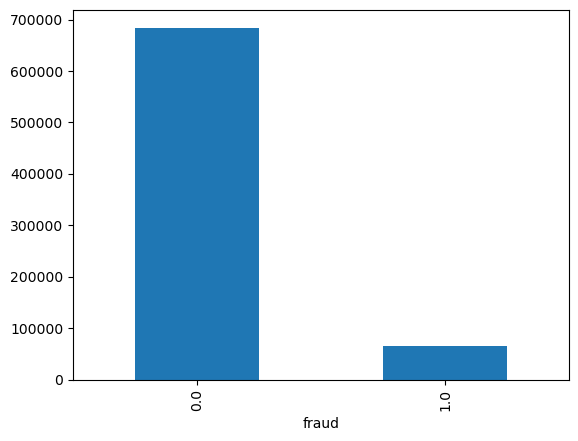

In [38]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?


In [41]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt




# Verificar el balanceo de clases antes del undersampling
print(fraud['fraud'].value_counts())

# Aplicar undersampling
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Verificar el balanceo de clases después del undersampling
print(y_resampled.value_counts())

# Graficar el balanceo de clases después del undersampling
y_resampled.value_counts().plot(kind='bar')
plt.title('Distribution undersampling')
plt.xlabel('fraud')
plt.ylabel('xxx')
plt.show()


fraud
1.0    65605
Name: count, dtype: int64


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 